In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d trainingdatapro/food-segmentation

 97% 33.0M/34.0M [00:03<00:00, 16.3MB/s]
100% 34.0M/34.0M [00:03<00:00, 11.3MB/s]


In [ ]:
!unzip -q food-segmentation.zip

In [ ]:
import os
import cv2
import numpy as np
from PIL import ImageColor

# Пути к папкам с изображениями и масками
img_folder = 'Food Segmentation/images'
mask_folder = 'Food Segmentation/masks'

# Список изображений и масок

# задаем цвета и соответствующие им индексы
colors = {
    ImageColor.getcolor('#92F2FF', "RGB"): 0,  # crust_edge
    ImageColor.getcolor('#FF3A3A', "RGB"): 1,  # charred_crust
    ImageColor.getcolor('#D3EAd3', "RGB"): 2,  # sausage
    ImageColor.getcolor('#FF9500', "RGB"): 3,  # ham
    ImageColor.getcolor('#50ACF3', "RGB"): 4,  # ground_beef
    ImageColor.getcolor('#FFF1CC', "RGB"): 5,  # tomato
    ImageColor.getcolor('#FF95D2', "RGB"): 6,  # olives
    ImageColor.getcolor('#BCFF7B', "RGB"): 7   # mushrooms
}

N_IMAGES = len(os.listdir(img_folder))
TRAIN_IMAGE_SIZE = 512
images = np.zeros((N_IMAGES, TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE, 3), dtype=np.uint8)
# Загрузка изображений и масок
for idx, filename in enumerate(os.listdir(img_folder)):
    img = cv2.imread(os.path.join(img_folder, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE))
    images[idx] = img


masks = np.zeros((N_IMAGES, TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE, len(colors)), dtype=np.uint8)
for idx, filename in enumerate(os.listdir(mask_folder)):
    # загружаем изображение
    mask = cv2.imread(os.path.join(mask_folder, filename))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    mask = cv2.resize(mask, (TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE))
    
    # перебираем каждый пиксель и записываем соответствующий индекс в тензор
    for i in range(TRAIN_IMAGE_SIZE):
        for j in range(TRAIN_IMAGE_SIZE):
            color = tuple(mask[i, j])
            if color in colors:
                masks[idx, i, j, colors[color]] = 1

import os
import cv2
import numpy as np
from PIL import ImageColor
from sklearn.model_selection import train_test_split

# Пути к папкам с изображениями и масками
img_folder = 'Food Segmentation/images'
mask_folder = 'Food Segmentation/masks'

# Список изображений и масок

# задаем цвета и соответствующие им индексы
colors = {
    ImageColor.getcolor('#92F2FF', "RGB"): 0,  # crust_edge
    ImageColor.getcolor('#FF3A3A', "RGB"): 1,  # charred_crust
    ImageColor.getcolor('#D3EAd3', "RGB"): 2,  # sausage
    ImageColor.getcolor('#FF9500', "RGB"): 3,  # ham
    ImageColor.getcolor('#50ACF3', "RGB"): 4,  # ground_beef
    ImageColor.getcolor('#FFF1CC', "RGB"): 5,  # tomato
    ImageColor.getcolor('#FF95D2', "RGB"): 6,  # olives
    ImageColor.getcolor('#BCFF7B', "RGB"): 7   # mushrooms
}

N_IMAGES = len(os.listdir(img_folder))
TRAIN_IMAGE_SIZE = 512
images = np.zeros((N_IMAGES, TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE, 3), dtype=np.uint8)
# Загрузка изображений и масок
for idx, filename in enumerate(os.listdir(img_folder)):
    img = cv2.imread(os.path.join(img_folder, filename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE))
    images[idx] = img


masks = np.zeros((N_IMAGES, TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE, len(colors)), dtype=np.uint8)
for idx, filename in enumerate(os.listdir(mask_folder)):
    # загружаем изображение
    mask = cv2.imread(os.path.join(mask_folder, filename))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    mask = cv2.resize(mask, (TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE))
    
    # перебираем каждый пиксель и записываем соответствующий индекс в тензор
    for i in range(TRAIN_IMAGE_SIZE):
        for j in range(TRAIN_IMAGE_SIZE):
            color = tuple(mask[i, j])
            if color in colors:
                masks[idx, i, j, colors[color]] = 1

# Нормализация данных
images = images / 255.0

# Разделение данных на обучающую, проверочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# проверяем размеры разделенных данных
print(X_train.shape) # (train_size, TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE, 3)
print(y_train.shape) # (train_size

(20, 512, 512, 8)


In [ ]:
images.shape

(20, 512, 512, 3)

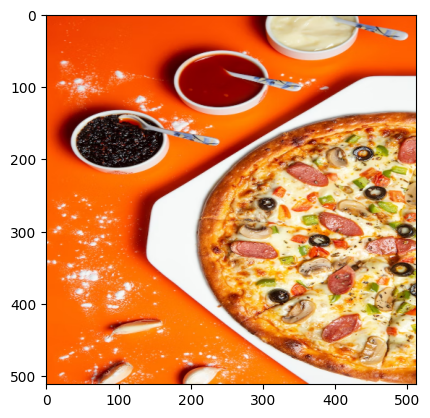

In [ ]:
import cv2
import os
# img_folder = 'Food Segmentation/images'
# filename = '6.png'
# img = cv2.imread(os.path.join(img_folder, filename))
#     # Переводим изображение из цветовой модели BGR в RGB
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     # Меняем размер изображения до требуемого размера TRAIN_IMAGE_SIZE x TRAIN_IMAGE_SIZE
# img = cv2.resize(img, (512, 512))

import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Отображение маски
for i in range(8):
    plt.imshow(masks[0, :, :, i])
    plt.imshow(images[0], alpha=.5)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.